Data description:

* Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [906]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import KMeans, kmeans_plusplus

In [907]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
survived_test_df = pd.read_csv('gender_submission.csv')

In [908]:
# data processing
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [909]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [910]:
test_df = test_df.merge(survived_test_df, how='inner', on='PassengerId')

In [911]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [912]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [913]:
survived_test_df.shape

(418, 2)

In [914]:
test_df.shape

(418, 12)

In [915]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [916]:
#let's check how the survival percentage distribution

train_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Nearly 38% of the people form the train data set survived.

In [917]:
train_df.shape

(891, 12)

In [918]:
# There are some missing values in Age, Cabin and Embarked
train_df.Age.isnull().sum()/891

0.19865319865319866

In [919]:
# nearly 20% of the values are missing from the dataset. We shall chech the Median for this variable.
train_df.Age.median()

28.0

The Median value for Age is 28, hence we can replace this with the null value.


In [920]:
# same should be done for the test data set
train_df.Age = train_df.Age.fillna(value=28)
test_df.Age = test_df.Age.fillna(value=28)

In [921]:
print(train_df.Age.isnull().sum())
print(test_df.Age.isnull().sum())

0
0


In [922]:
train_df.Age.median()

28.0

In [923]:
train_df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [924]:
# Now all the null values are taken care, now let's move on to the Embarked column. Let's check the percnetage of vlaues missing.

train_df.Embarked.isnull().sum()/891

0.002244668911335578

In [925]:
# let's also replace it with the median
train_df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [926]:
# most of the people are from 'S' category, hence replace the missing values with 'S'
train_df.Embarked = train_df.Embarked.fillna(value="S")
test_df.Embarked = test_df.Embarked.fillna(value="S")

In [927]:
# Let's check the null values again

print(train_df.Embarked.isnull().sum())
print(test_df.Embarked.isnull().sum())

0
0


In [928]:
# Now let's move on to Cabin
train_df.Cabin.isnull().sum()/891

0.7710437710437711

In [929]:
# amlost 77% of the data is missing. Let's dorp this.

train_df.drop(labels='Cabin', axis=1, inplace=True)
test_df.drop(labels='Cabin', axis=1, inplace=True)

In [930]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [931]:
# let's check the null values

In [932]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [933]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
dtype: int64

In [934]:
# let's take care of that missing value
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [935]:
test_df.groupby(by=['Pclass', 'Sex']).median()

PassengerId   Age  SibSp  Parch      Fare  Survived
Pclass Sex                                                        
1      female       1088.0  39.0    0.0    0.0  79.02500       1.0
       male         1094.0  41.0    0.0    0.0  51.86250       0.0
2      female       1122.0  24.0    0.0    0.0  26.00000       1.0
       male         1122.0  28.0    0.0    0.0  13.00000       0.0
3      female       1070.5  28.0    0.0    0.0   8.08125       1.0
       male         1102.5  28.0    0.0    0.0   7.89580       0.0

In [936]:
train_df.groupby(by=['Pclass', 'Sex']).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        447.0       1.0  32.5    0.0    0.0  82.66455
       male          480.5       0.0  36.0    0.0    0.0  41.26250
2      female        439.5       1.0  28.0    0.0    0.0  22.00000
       male          416.5       0.0  29.0    0.0    0.0  13.00000
3      female        376.0       0.5  28.0    0.0    0.0  12.47500
       male          466.0       0.0  28.0    0.0    0.0   7.92500

In [937]:
pd.pivot_table(train_df, values='Fare', columns=['Embarked', 'Sex'], index=['Pclass'], aggfunc=np.median, fill_value="e")

Embarked        C               Q              S       
Sex        female     male female   male  female   male
Pclass                                                 
1         83.1583  61.6792  90.00  90.00  79.825  35.00
2         24.0000  25.8604  12.35  12.35  23.000  13.00
3         14.4583   7.2292   7.75   7.75  14.450   8.05

In [938]:
# the missing value is a male and Pclass 3 and Embarked S, hence the value 8.05

test_df.Fare = test_df.Fare.fillna(value=8.05)

In [939]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [940]:
test_df[test_df.PassengerId == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,S,0


In [941]:
train_df.groupby(by="Ticket").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Ticket,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,2,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
W./C. 6608,4,4,4,4,4,4,4,4,4,4
W./C. 6609,1,1,1,1,1,1,1,1,1,1
W.E.P. 5734,1,1,1,1,1,1,1,1,1,1


In [942]:
train_df[train_df.Ticket == "110413"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,S


In [943]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [944]:
train_group = train_df.groupby(by=['Ticket']).count()
test_group = test_df.groupby(by=['Ticket']).count()

In [945]:
train_group['Fare'] = train_group.Fare.apply(lambda x : 1/x)
test_group['Fare'] = test_group.Fare.apply(lambda x : 1/x)

In [946]:
train_fair=train_group.Fare
test_fair=test_group.Fare

In [947]:
train_df_final = train_df.merge(train_fair, on="Ticket", how="inner")
test_df_final = test_df.merge(test_fair, on="Ticket", how="inner")

In [948]:
train_df_final['Price'] = train_df_final.apply(lambda x: x['Fare_x']*x['Fare_y'], axis=1)
test_df_final['Price'] = test_df_final.apply(lambda x: x['Fare_x']*x['Fare_y'], axis=1)

In [949]:
train_df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_x,Embarked,Fare_y,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.5,26.5500
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,S,0.5,26.5500


In [950]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [951]:
train_df_final[train_df_final.Ticket == "W./C. 6608"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_x,Embarked,Fare_y,Price
153,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,S,0.25,8.59375
154,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,S,0.25,8.59375
155,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,S,0.25,8.59375
156,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,S,0.25,8.59375


In [952]:
train_df_final.drop(labels='Fare_y', inplace=True, axis=1)

In [953]:
train_df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_x,Embarked,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.5500
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,S,26.5500
...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,7.0500
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,13.0000
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,30.0000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,30.0000


In [954]:
train_df['Price'] = train_df_final['Price']
train_df.drop(labels='Fare', axis=1, inplace=True)

test_df['Price'] = test_df_final['Price']
test_df.drop(labels='Fare', axis=1, inplace=True)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,26.5500
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,7.0500
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,13.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,30.0000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,30.0000


In [955]:
train_df.drop(labels=['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

### Analysis

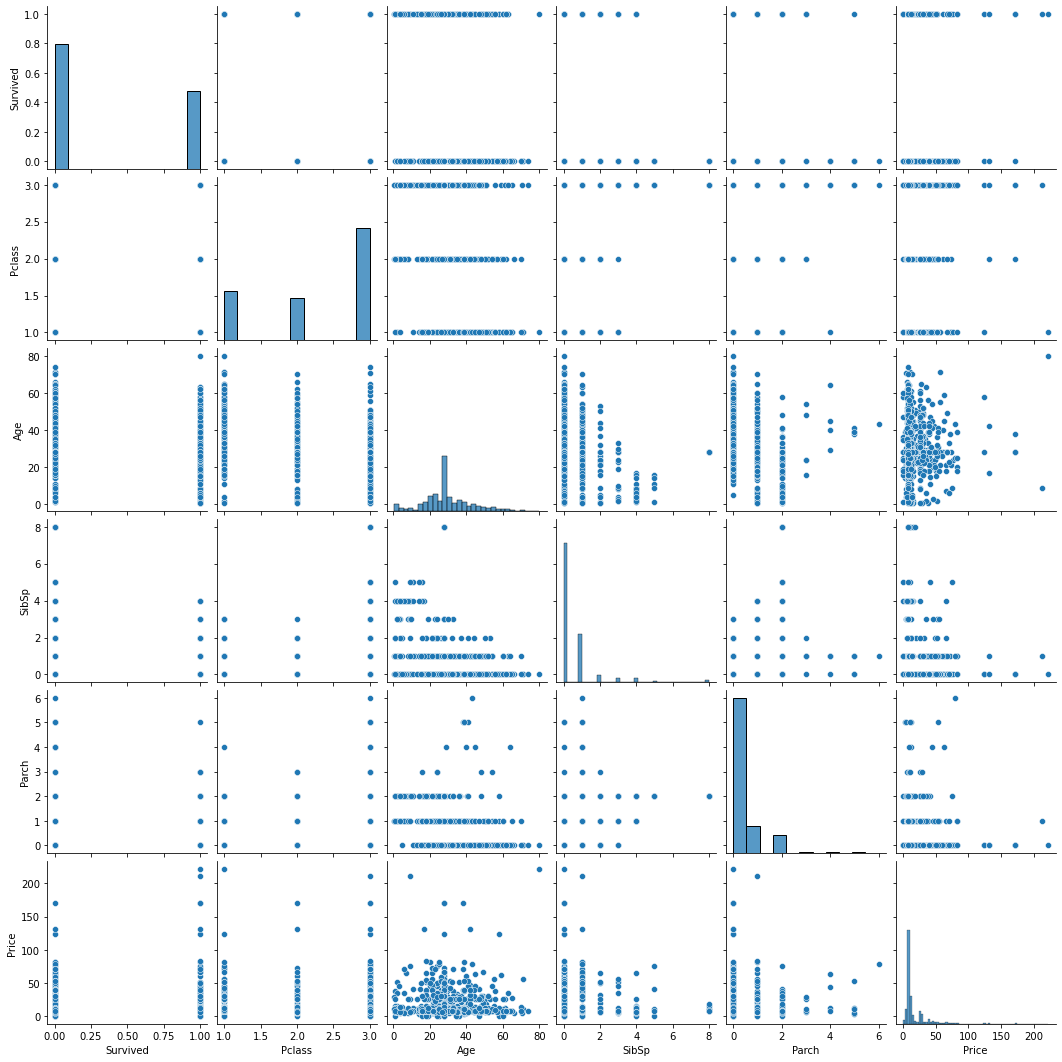

In [956]:
sns.pairplot(train_df)
plt.show()

In [957]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Price'],
      dtype='object')

In [958]:
#c convet categorical variables to numerice categories

train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [959]:
# train_df.Sex = train_df.Sex.map({'male': 1, 'female':0})
train_df.Survived = train_df.Survived.map({0:'Not-Survivied', 1: 'Survived'})

In [960]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [961]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [962]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [963]:
train_df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [964]:
# train_df.Embarked = train_df.Embarked.map({"S":0, "C":1, "Q":2})
# (C = Cherbourg; Q = Queenstown; S = Southampton)
train_df.Embarked = train_df.Embarked.map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

In [965]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Price
0,Not-Survivied,3,male,22.0,1,0,Southampton,7.2500
1,Survived,1,female,38.0,1,0,Cherbourg,71.2833
2,Survived,3,female,26.0,0,0,Southampton,7.9250
3,Survived,1,female,35.0,1,0,Southampton,26.5500
4,Not-Survivied,3,male,35.0,0,0,Southampton,26.5500


In [966]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   Price     891 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [967]:
train_df.Age = train_df.Age.astype(int)

In [968]:
train_df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


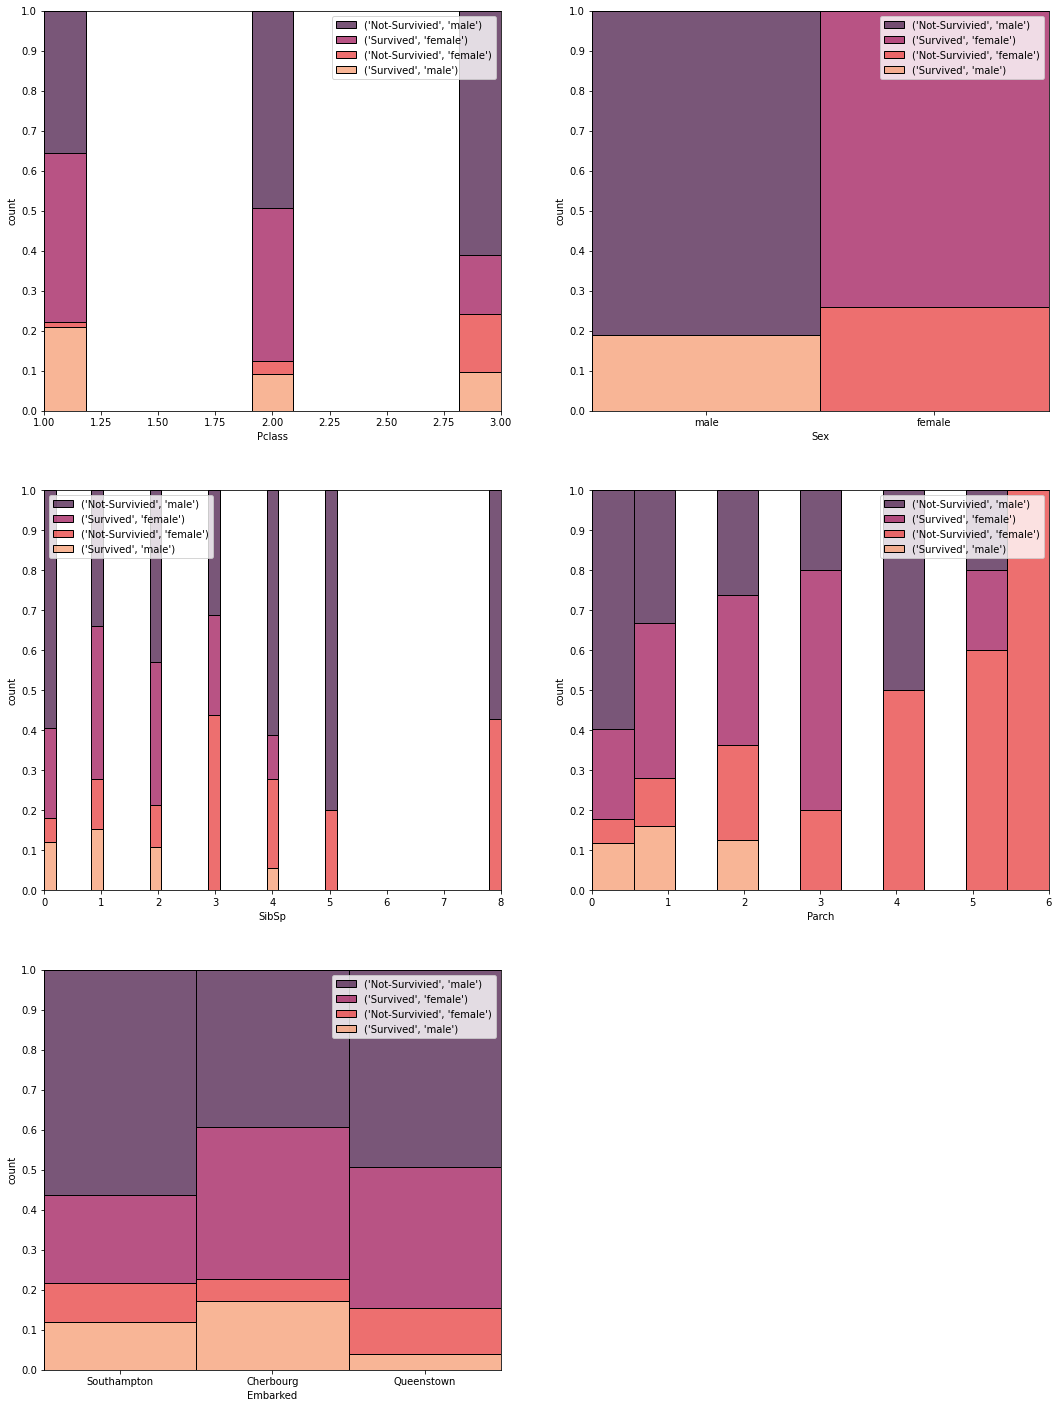

In [969]:
#now let's plot bar plot/countplot for the categorical variables.
plt.figure(figsize=[18,25])
cat_cols = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i in range(0, len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.histplot(data=train_df, x=cat_cols[i], hue=train_df[['Survived', 'Sex']].apply(tuple,axis=1)
                ,stat='percent' ,multiple='fill', element='bars', palette="rocket")
    plt.xlabel(cat_cols[i])
#     if cat_cols[i] == 'Sex':
#         plt.xticks('Female', 'Male')
    plt.ylabel('count')
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.draw()

#### Inference

after looking at all the 5 plots and the porbability of survived or not, here is the inferance that can be drawn.

* Majority of the non survival's are males - 80% of them did not survived.
* 75% of the females on the Titanic survived.
* Pclass - 
           1st class people => 36% not survived (35% of them are male)
           2nd class people => 53% not survived (50% of them are male)
           3rd Class people => 71% not survived (60% male, 11% female)
* People with spouse or sibling count under 4 has a pretty good surivival rate, then after there are no surviors.
* Parent or Children count under 3 has a good survival rate, and decreases
* people from Cherbourg has the highest survival rate and lowest death rate.
* Queenstown has the highest death rate.

In [970]:
def fun(x):
    tMale = 577
    tFemale = 314
    count = len(x['Sex'])
    result = 0
    if 'female' in x['Sex'].unique():
        result = count/314
    else:
        result = count/577
    return result
    


sex_survival_dist = train_df.groupby(by=['Sex','Survived']).apply(fun).unstack()
sex_survival_dist.columns= ['Not survived', 'Survived']
sex_survival_dist.index = ['Female', 'Male']
sex_survival_dist


#from the below df we can see that 75% of the females survived, and above 81% of the male did not survived 

,Not survived,Survived
Female,0.257962,0.742038
Male,0.811092,0.188908


[]

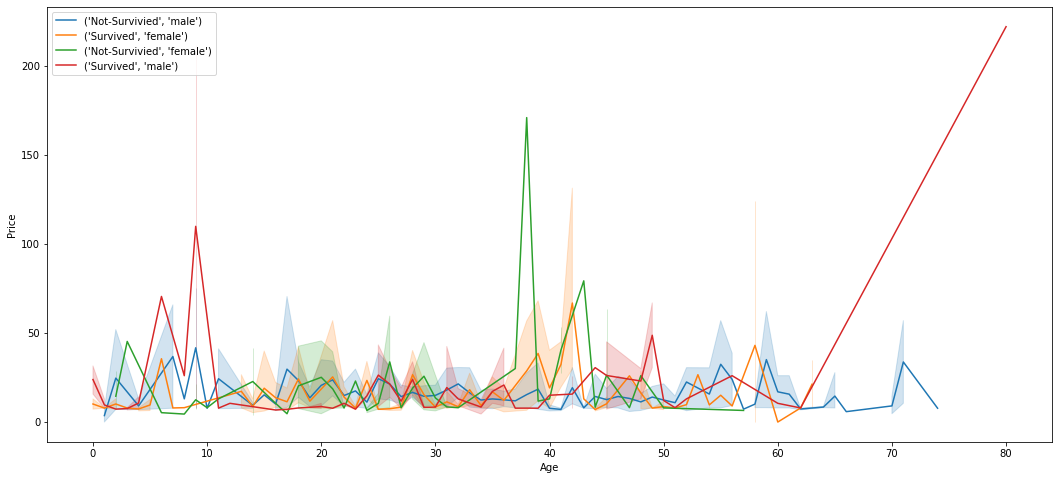

In [971]:
cont_cols=[ 'Age', 'Price']

plt.figure(figsize=[18, 8])
# plt.subplot(3,1,1)
sns.lineplot(x='Age', y='Price', data=train_df, hue=train_df[['Survived', 'Sex']].apply(tuple, axis=1),
                )
plt.xlabel('Age')
plt.ylabel('Price')
# plt.legend(['Not-Survived', 'Survived'])

# plt.subplot(3,1,2)
# sns.scatterplot(x='Price', data=train_df, hue='Sex')
# plt.xlabel('Price')
# plt.legend('Sex')

# plt.subplot(3,1,3)
# train_df.plot.scatter(x='Price', y="Age")
# plt.xlabel('Price')
# plt.ylabel('Age')
# plt.legend('Price', 'Age')

plt.plot()

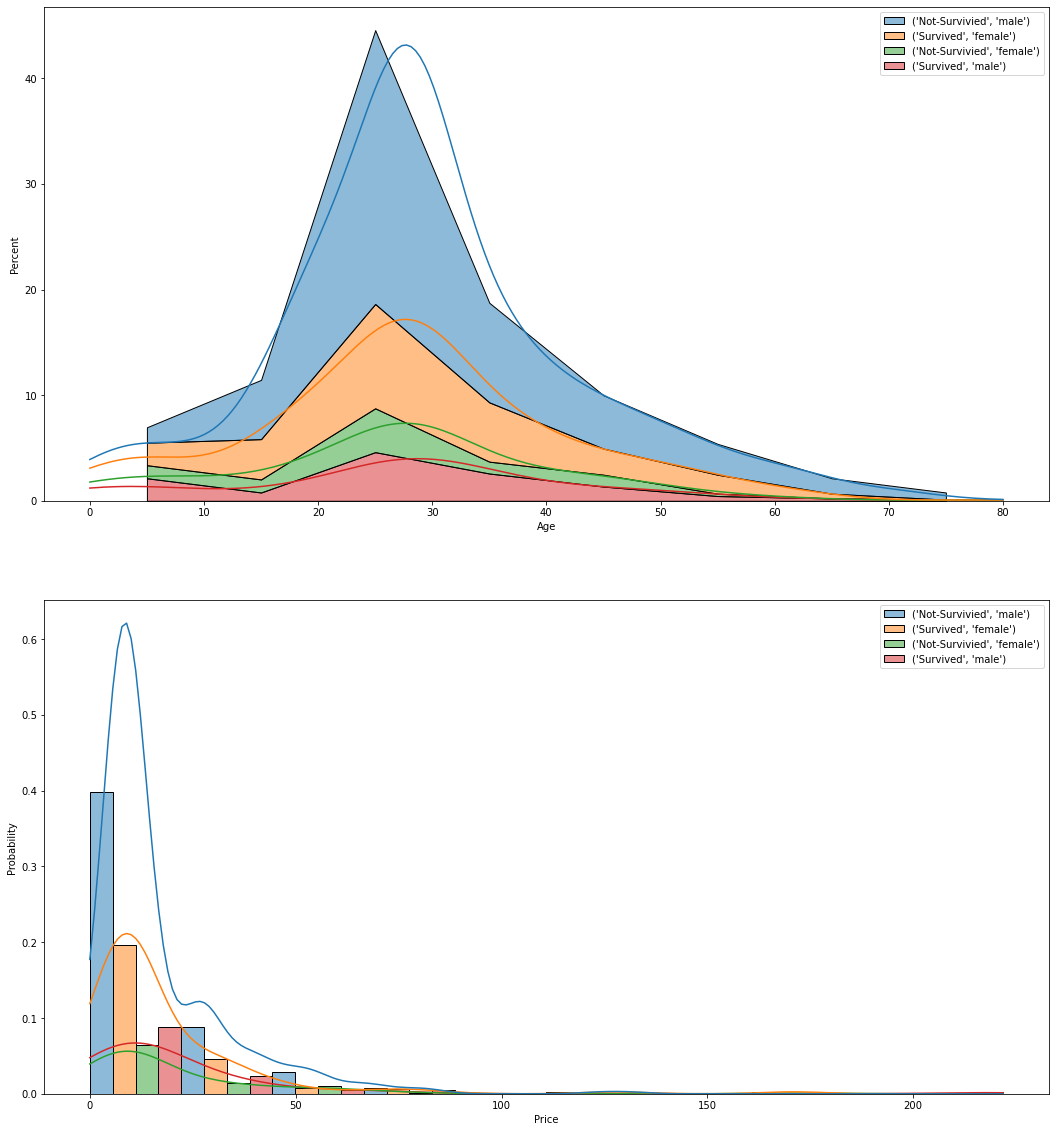

In [972]:
#'letsplot the histogram of age'

plt.figure(figsize=[18, 20])
plt.subplot(2,1,1)
sns.histplot(data=train_df, x='Age', bins=8, hue=train_df[['Survived', 'Sex']].apply(tuple, axis=1)
             ,kde=True,multiple="stack",  element='poly', stat='percent')

plt.subplot(2,1,2)
sns.histplot(data=train_df, x='Price', bins=10, hue=train_df[['Survived', 'Sex']].apply(tuple, axis=1)
            , kde=True, multiple="dodge", element='bars',stat='probability')
#                 ,kind="hist" ,multiple="dodge",stat='probability', height=10)

# for ax in fg.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:

#         # custom label calculates percent and add an empty string so 0 value bars don't have a number
#         labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

#         ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2)
    
#     ax.margins(y=0.2)
    
plt.show()

[]

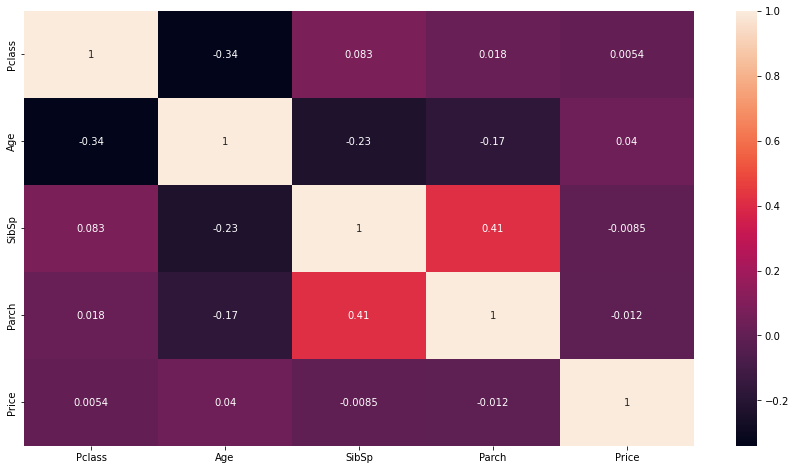

In [973]:
#let's plot heatmap
plt.figure(figsize=[15,8])
sns.heatmap(data=train_df.corr(), annot=True)
plt.plot()

In [974]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Price'],
      dtype='object')

[]

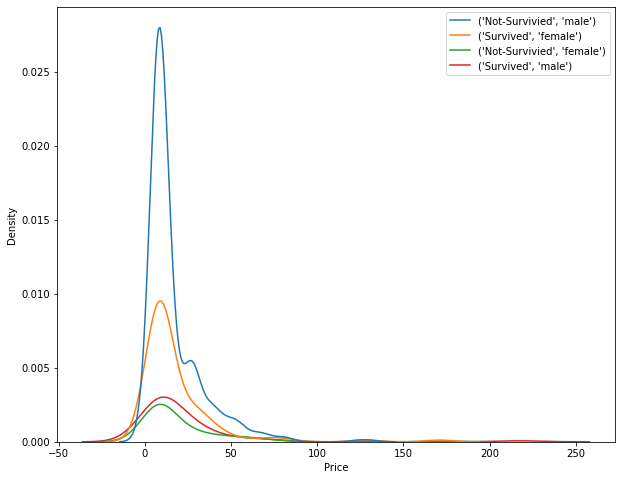

In [975]:
plt.figure(figsize=[10,8])
sns.kdeplot(data=train_df, x='Price', hue=train_df[['Survived', 'Sex']].apply(tuple, axis=1))
plt.plot()

In [976]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Price
0,Not-Survivied,3,male,22,1,0,Southampton,7.2500
1,Survived,1,female,38,1,0,Cherbourg,71.2833
2,Survived,3,female,26,0,0,Southampton,7.9250
3,Survived,1,female,35,1,0,Southampton,26.5500
4,Not-Survivied,3,male,35,0,0,Southampton,26.5500


In [977]:
bins = [0,10,20,30,40,50,60,70,80,90,100,10000]
labels =['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100','100+']

train_df.Age = pd.cut(train_df.Age, labels=labels, bins=bins)
test_df.Age = pd.cut(test_df.Age, labels=labels, bins=bins)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Price
0,Not-Survivied,3,male,20-30,1,0,Southampton,7.2500
1,Survived,1,female,30-40,1,0,Cherbourg,71.2833
2,Survived,3,female,20-30,0,0,Southampton,7.9250
3,Survived,1,female,30-40,1,0,Southampton,26.5500
4,Not-Survivied,3,male,30-40,0,0,Southampton,26.5500


In [978]:
train_df.Price.median()

8.85

In [979]:
train_df[train_df.Price == 0].Price.count()

15

In [980]:
# train_df.Price = train_df[train_df.Price == 0].Price=8.85


In [981]:
train_df.Price.describe()

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
max      221.779200
Name: Price, dtype: float64

In [982]:
train_df.Price = train_df.Price.replace(0, 8.85)
test_df.Price = test_df.Price.replace(0, 8.85)

In [983]:
train_df[train_df.Price == 0].Price.count()

0

In [984]:
train_df.Price.describe()

count    891.000000
mean      17.937979
std       21.123477
min        3.711100
25%        7.775000
50%        8.850000
75%       24.288200
max      221.779200
Name: Price, dtype: float64

In [985]:
bins = [0,25,50,75,100,125,150,175,200,225,10000]
labels =['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200', '200-225', '225+']

train_df.Price = pd.cut(train_df.Price, labels=labels, bins=bins)
test_df.Price = pd.cut(test_df.Price, labels=labels, bins=bins)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Price
0,Not-Survivied,3,male,20-30,1,0,Southampton,0-25
1,Survived,1,female,30-40,1,0,Cherbourg,50-75
2,Survived,3,female,20-30,0,0,Southampton,0-25
3,Survived,1,female,30-40,1,0,Southampton,25-50
4,Not-Survivied,3,male,30-40,0,0,Southampton,25-50


In [986]:
train_df.Embarked = train_df.Embarked.map({"Southampton": "S", "Cherbourg": "C", "Queenstown" :"Q"})

train_df = pd.get_dummies(data=train_df, columns=['Age', 'Price', 'Sex', 'Embarked'], drop_first=True)
print(train_df.columns)
train_df.head()

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Age_10-20', 'Age_20-30',
       'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_60-70', 'Age_70-80',
       'Age_80-90', 'Age_90-100', 'Age_100+', 'Price_25-50', 'Price_50-75',
       'Price_75-100', 'Price_100-125', 'Price_125-150', 'Price_150-175',
       'Price_175-200', 'Price_200-225', 'Price_225+', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Survived,Pclass,SibSp,Parch,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,...,Price_75-100,Price_100-125,Price_125-150,Price_150-175,Price_175-200,Price_200-225,Price_225+,Sex_male,Embarked_Q,Embarked_S
0,Not-Survivied,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,Survived,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Survived,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Survived,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Not-Survivied,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [987]:
test_df = pd.get_dummies(data=test_df, columns=['Age', 'Price', 'Sex', 'Embarked'], drop_first=True)
print(test_df.columns)
test_df.head()

Index(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Survived',
       'Age_10-20', 'Age_20-30', 'Age_30-40', 'Age_40-50', 'Age_50-60',
       'Age_60-70', 'Age_70-80', 'Age_80-90', 'Age_90-100', 'Age_100+',
       'Price_25-50', 'Price_50-75', 'Price_75-100', 'Price_100-125',
       'Price_125-150', 'Price_150-175', 'Price_175-200', 'Price_200-225',
       'Price_225+', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


,PassengerId,Pclass,Name,SibSp,Parch,Ticket,Survived,Age_10-20,Age_20-30,Age_30-40,...,Price_75-100,Price_100-125,Price_125-150,Price_150-175,Price_175-200,Price_200-225,Price_225+,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,0,330911,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,0,240276,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,895,3,"Wirz, Mr. Albert",0,0,315154,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [988]:
test_df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
test_df.columns

Index(['Pclass', 'SibSp', 'Parch', 'Survived', 'Age_10-20', 'Age_20-30',
       'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_60-70', 'Age_70-80',
       'Age_80-90', 'Age_90-100', 'Age_100+', 'Price_25-50', 'Price_50-75',
       'Price_75-100', 'Price_100-125', 'Price_125-150', 'Price_150-175',
       'Price_175-200', 'Price_200-225', 'Price_225+', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [989]:
print('train columns len =>', len(train_df.columns), '| test columns len =>', len(test_df.columns))

train columns len => 26 | test columns len => 26


In [990]:
train_df.Survived = train_df.Survived.map({"Not-Survivied" : 0, "Survived" : 1})


In [991]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,...,Price_75-100,Price_100-125,Price_125-150,Price_150-175,Price_175-200,Price_200-225,Price_225+,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [992]:
y_train = train_df['Survived']
x_train = train_df.drop(labels=['Survived'], axis=1)
logR = LogisticRegression()
logR.fit(x_train, y_train)

rfe = RFE(logR, step=15)
rfe = rfe.fit(x_train, y_train)

In [993]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('SibSp', True, 1),
 ('Parch', False, 2),
 ('Age_10-20', True, 1),
 ('Age_20-30', True, 1),
 ('Age_30-40', True, 1),
 ('Age_40-50', True, 1),
 ('Age_50-60', True, 1),
 ('Age_60-70', True, 1),
 ('Age_70-80', True, 1),
 ('Age_80-90', False, 2),
 ('Age_90-100', False, 2),
 ('Age_100+', False, 2),
 ('Price_25-50', False, 2),
 ('Price_50-75', False, 2),
 ('Price_75-100', False, 2),
 ('Price_100-125', False, 2),
 ('Price_125-150', False, 2),
 ('Price_150-175', False, 2),
 ('Price_175-200', False, 2),
 ('Price_200-225', True, 1),
 ('Price_225+', False, 2),
 ('Sex_male', True, 1),
 ('Embarked_Q', False, 2),
 ('Embarked_S', True, 1)]

In [994]:
supported_col = x_train.columns[rfe.support_]
print(supported_col)

Index(['Pclass', 'SibSp', 'Age_10-20', 'Age_20-30', 'Age_30-40', 'Age_40-50',
       'Age_50-60', 'Age_60-70', 'Age_70-80', 'Price_200-225', 'Sex_male',
       'Embarked_S'],
      dtype='object')


In [995]:
import statsmodels.api as sm

x_train_rfe = x_train[supported_col]
x_train_1 = sm.add_constant(x_train_rfe)

In [996]:
logR1 = sm.GLM(y_train, x_train_1, family=sm.families.Binomial()).fit()
logR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.66
Date:                Sun, 12 Feb 2023   Deviance:                       767.32
Time:                        18:08:32   Pearson chi2:                     942.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1042      0.583     10.465      0.000       4.961       7.247
Pclass           -1.0989      0.121     -9.111      0.000      -1.335      -0.862
SibSp            -0.4499      0.119     -3.771      0.000      -0.684      -0.216
Age_10-20        -1.7014      0.460     -3.696      0.000      -2.604      -0.799
Age_20-30        -1.9971      0.413     -4.838      0.000      -2.806      -1.188
Age_30-40        -1.6599      0.443     -3.749      0.000      -2.528      -0.792
Age_40-50        -2.3026      0.487     -4.728      0.000      -3.257      -1.348
Age_50-60        -2.6503      0.581     -4.559      0.000      -3.790      -1.511
Age_60-70        -3.0819      0.778     -3.961      0.000      -4.607      -1.557
Age_70-80       -23.8587   2.08e+04     -0.001      0.999   -4.08e+04    4.08e+04
Price_200-225    43.7517   3.65e+04      0.001      0.999   -7.15e+04    7.16e+04
Sex_male         -2.7603      0.198    -13.944      0.000      -3.148      -2.372
Embarked_S       -0.5225      0.203     -2.577      0.010      -0.920      -0.125
=================================================================================
"""

p-value for age_70-80 and price_200-225, first drop age and check again

In [997]:
x_train_rfe.drop(labels='Age_70-80', axis=1, inplace=True)

x_train_2 = sm.add_constant(x_train_rfe)

logR2 = sm.GLM(y_train, x_train_2, family=sm.families.Binomial()).fit()

logR2.summary()

/var/folders/xg/cr0p4v9907d0cvhf93yyxs480000gn/T/ipykernel_1007/1479576294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(labels='Age_70-80', axis=1, inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -388.40
Date:                Sun, 12 Feb 2023   Deviance:                       776.80
Time:                        18:08:32   Pearson chi2:                     924.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6536      0.549     10.296      0.000       4.577       6.730
Pclass           -1.0637      0.119     -8.921      0.000      -1.297      -0.830
SibSp            -0.4035      0.114     -3.524      0.000      -0.628      -0.179
Age_10-20        -1.4010      0.439     -3.193      0.001      -2.261      -0.541
Age_20-30        -1.6777      0.387     -4.331      0.000      -2.437      -0.918
Age_30-40        -1.3398      0.420     -3.191      0.001      -2.163      -0.517
Age_40-50        -1.9763      0.466     -4.245      0.000      -2.889      -1.064
Age_50-60        -2.2953      0.561     -4.090      0.000      -3.395      -1.195
Age_60-70        -2.7345      0.763     -3.582      0.000      -4.231      -1.238
Price_200-225    21.8564   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
Sex_male         -2.7582      0.196    -14.054      0.000      -3.143      -2.374
Embarked_S       -0.4718      0.201     -2.343      0.019      -0.867      -0.077
=================================================================================
"""

pvalue is still high for price_200-225, hence we need to drop this as well

In [998]:
x_train_rfe.drop(labels='Price_200-225', axis=1, inplace=True)

x_train_3 = sm.add_constant(x_train_rfe)
logR3 = sm.GLM(y_train, x_train_3, family=sm.families.Binomial()).fit()
logR3.summary()

/var/folders/xg/cr0p4v9907d0cvhf93yyxs480000gn/T/ipykernel_1007/3752915385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(labels='Price_200-225', axis=1, inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -390.02
Date:                Sun, 12 Feb 2023   Deviance:                       780.03
Time:                        18:08:32   Pearson chi2:                     930.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3664
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7516      0.548     10.502      0.000       4.678       6.825
Pclass        -1.0620      0.119     -8.942      0.000      -1.295      -0.829
SibSp         -0.4131      0.115     -3.602      0.000      -0.638      -0.188
Age_10-20     -1.5092      0.436     -3.463      0.001      -2.363      -0.655
Age_20-30     -1.7871      0.384     -4.652      0.000      -2.540      -1.034
Age_30-40     -1.4508      0.416     -3.485      0.000      -2.267      -0.635
Age_40-50     -2.0851      0.462     -4.509      0.000      -2.991      -1.179
Age_50-60     -2.4042      0.558     -4.308      0.000      -3.498      -1.310
Age_60-70     -2.8474      0.761     -3.743      0.000      -4.338      -1.356
Sex_male      -2.7485      0.196    -14.024      0.000      -3.133      -2.364
Embarked_S    -0.4638      0.201     -2.305      0.021      -0.858      -0.069
==============================================================================
"""

#### let's start checking the VIF's

In [999]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1000]:
def vifFunction ():
    vif = pd.DataFrame()
    vif['Features'] = x_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
vifFunction()

,Features,VIF
0,Pclass,7.12
3,Age_20-30,3.88
9,Embarked_S,3.60
8,Sex_male,2.96
4,Age_30-40,1.93
2,Age_10-20,1.85
5,Age_40-50,1.45
1,SibSp,1.28
6,Age_50-60,1.17
7,Age_60-70,1.11


Let's drop PClass 

In [1001]:
x_train_rfe.drop(labels='Pclass', axis=1, inplace=True)

x_train_4 = sm.add_constant(x_train_rfe)
logR4 = sm.GLM(y_train, x_train_4, family=sm.families.Binomial()).fit()
logR4.summary()

/var/folders/xg/cr0p4v9907d0cvhf93yyxs480000gn/T/ipykernel_1007/1378820874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(labels='Pclass', axis=1, inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -435.04
Date:                Sun, 12 Feb 2023   Deviance:                       870.09
Time:                        18:08:32   Pearson chi2:                     898.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2990
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1175      0.417      7.479      0.000       2.300       3.934
SibSp         -0.4234      0.106     -4.009      0.000      -0.630      -0.216
Age_10-20     -1.5044      0.412     -3.647      0.000      -2.313      -0.696
Age_20-30     -1.6677      0.365     -4.573      0.000      -2.383      -0.953
Age_30-40     -0.9839      0.389     -2.529      0.011      -1.746      -0.221
Age_40-50     -1.3568      0.437     -3.103      0.002      -2.214      -0.500
Age_50-60     -1.2489      0.506     -2.467      0.014      -2.241      -0.257
Age_60-70     -1.8021      0.727     -2.477      0.013      -3.228      -0.376
Sex_male      -2.6639      0.181    -14.730      0.000      -3.018      -2.309
Embarked_S    -0.5752      0.189     -3.050      0.002      -0.945      -0.206
==============================================================================
"""

In [1002]:
vifFunction()

,Features,VIF
8,Embarked_S,3.35
7,Sex_male,2.76
2,Age_20-30,2.35
3,Age_30-40,1.61
1,Age_10-20,1.40
4,Age_40-50,1.32
0,SibSp,1.20
5,Age_50-60,1.14
6,Age_60-70,1.09


VIF's are all below 5 hence say logR4 is our final modal

In [1003]:
#lets do predict

y_predict = logR4.predict(x_train_4)

In [1004]:
y_df = pd.DataFrame({"y_predict": y_predict, "y_actual": y_train})
y_df.head()

,y_predict,y_actual
0,0.098612,0
1,0.846856,1
2,0.705697,1
3,0.756755,1
4,0.248703,0


In [1005]:
num = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for i in num:
    y_df[i] = y_df.y_predict.map(lambda x: 1 if x >i else 0)
    
y_df

,y_predict,y_actual,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,0.098612,0,1,0,0,0,0,0,0,0,0,0,0
1,0.846856,1,1,1,1,1,1,1,1,1,1,0,0
2,0.705697,1,1,1,1,1,1,1,1,1,0,0,0
3,0.756755,1,1,1,1,1,1,1,1,1,0,0,0
4,0.248703,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.143154,0,1,1,0,0,0,0,0,0,0,0,0
887,0.738439,1,1,1,1,1,1,1,1,1,0,0,0
888,0.610918,0,1,1,1,1,1,1,1,0,0,0,0
889,0.228967,1,1,1,1,0,0,0,0,0,0,0,0


In [1008]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_df.y_actual, y_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.427609  0.991228  0.076503
0.2   0.2  0.684624  0.847953  0.582878
0.3   0.3  0.795735  0.751462  0.823315
0.4   0.4  0.795735  0.698830  0.856102
0.5   0.5  0.791246  0.675439  0.863388
0.6   0.6  0.789001  0.663743  0.867031
0.7   0.7  0.775533  0.573099  0.901639
0.8   0.8  0.701459  0.286550  0.959927
0.9   0.9  0.626263  0.035088  0.994536


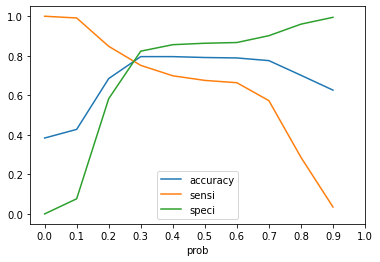

In [1013]:
cutoff_df.plot(y=['accuracy', 'sensi', 'speci'], x='prob')
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

0.26 might be the cutoff

In [1014]:
y_train_final = pd.DataFrame({"y_predict":y_predict, "y_actual":y_train})

y_train_final


,y_predict,y_actual
0,0.098612,0
1,0.846856,1
2,0.705697,1
3,0.756755,1
4,0.248703,0
...,...,...
886,0.143154,0
887,0.738439,1
888,0.610918,0
889,0.228967,1


In [1015]:
y_train_final['prediction'] = y_train_final.y_predict.map(lambda x: 1 if x > 0.26 else 0)
y_train_final

,y_predict,y_actual,prediction
0,0.098612,0,0
1,0.846856,1,1
2,0.705697,1,1
3,0.756755,1,1
4,0.248703,0,0
...,...,...,...
886,0.143154,0,0
887,0.738439,1,1
888,0.610918,0,1
889,0.228967,1,0


In [1016]:
confusion_matrix(y_train_final.y_actual, y_train_final.prediction)

array([[447, 102],
       [ 84, 258]])

In [1017]:
accuracy_score(y_train_final.y_actual, y_train_final.prediction)

0.7912457912457912

In [1036]:
# now let's test this on test_data
rfe_supp_cols = (x_train_4.drop(labels='const', axis=1).columns)

x_test = test_df.drop(labels='Survived', axis=1)
y_test = survived_test_df.drop(labels="PassengerId", axis=1)['Survived']
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [1037]:


y_test_pred = logR4.predict(sm.add_constant(x_test[rfe_supp_cols]))

y_test_df = pd.DataFrame({"y_test_":y_test_pred, "y_test_actual": y_test})
y_test_df

,y_test_,y_test_actual
0,0.370433,0
1,0.681812,1
2,0.206109,0
3,0.143154,0
4,0.610918,1
...,...,...
413,0.143154,0
414,0.894122,1
415,0.248703,0
416,0.143154,0


In [1038]:
y_test_df['prediction'] = y_test_df.y_test_.map(lambda x: 1 if x > 0.26 else 0)
y_test_df

,y_test_,y_test_actual,prediction
0,0.370433,0,1
1,0.681812,1,1
2,0.206109,0,0
3,0.143154,0,0
4,0.610918,1,1
...,...,...,...
413,0.143154,0,0
414,0.894122,1,1
415,0.248703,0,0
416,0.143154,0,0


In [1039]:
confusion_matrix(y_test, y_test_df.prediction)

array([[240,  26],
       [  1, 151]])

In [1040]:
accuracy_score(y_test, y_test_df.prediction)

0.9354066985645934